<a href="https://colab.research.google.com/github/buttersaltpepper/Financial-Data-Analytics/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Linear Regression with Python**

# **Dataset 1. US Housing**

**Objective**

Try to predict housing prices for regions in the USA.



**Dataset**
* **Avg. Area Income** Avg. Income of residents
* **Avg. Area House Age** Avg. Age of houses in same city
* **Avg. Area Number of Rooms** Avg. Number of rooms for houses in same city
* **Avg. Area Number of Bedrooms** Avg number of bedrooms for houses in same city
* **Area Population** Population of location
* **Price** Price the house was sold for
* **Address** Address for house

## Import Data

In [ ]:
!curl https://raw.githubusercontent.com/markumreed/colab_sklearn/main/housing.csv >> housing.csv



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  709k  100  709k    0     0  2129k      0 --:--:-- --:--:-- --:--:-- 2123k


In [ ]:
import pandas as pd
import numpy as np

from scipy.stats import stats, kurtosis, skew

from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm


import seaborn as sns
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (10,5)

In [ ]:
housing = pd.read_csv('housing.csv')
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
housing.info()
# everything is float, besides address

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
housing.describe()
# the price is Y-label
# everything else is feature

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
# Clean up names: lower case, remove periods, add underscore
housing.columns = [x.lower().replace('.','').replace(' ', '_') for x in housing.columns]
housing.columns

Index(['avg_area_income', 'avg_area_house_age', 'avg_area_number_of_rooms',
       'avg_area_number_of_bedrooms', 'area_population', 'price', 'address'],
      dtype='object')

## Exploratory Data Analysis

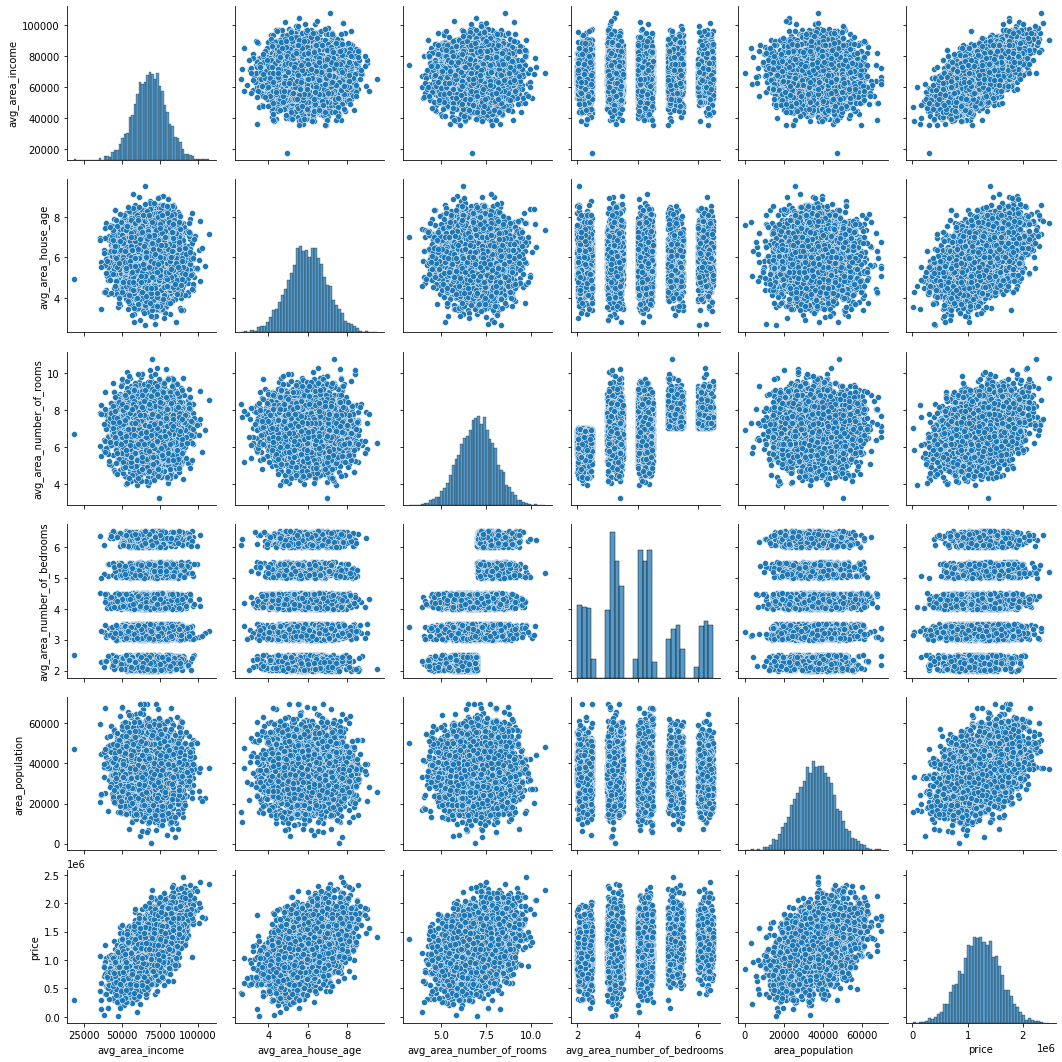

In [ ]:
sns.pairplot(housing);

Every variable seems to have relatively positive correlation to price.
* Price also looks normally distributed

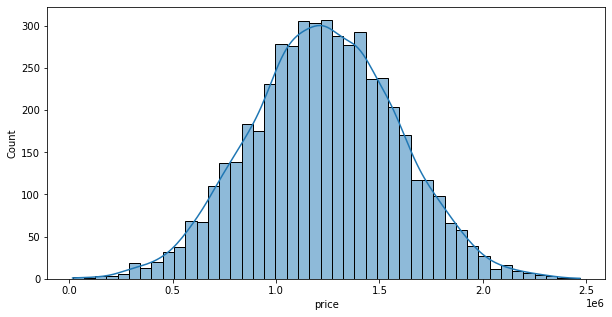

In [ ]:
sns.histplot(housing.price, kde=True);

In [ ]:
housing_num = housing.select_dtypes(exclude='O')

In [ ]:
num_stats_df = pd.DataFrame(columns=['r', 'p-value', 'kurtosis', 'skewness', 'White p-value'])

for col in housing_num.drop('price',axis=1):

  r, p = stats.pearsonr(housing_num[col], housing_num.price)
  kurt, skew = stats.kurtosis(housing_num[col]), stats.skew(housing_num[col])

  model = sm.OLS(housing_num.price, housing_num[[col]].assign(const=1)).fit()
  white_test = het_white(model.resid, model.model.exog)
  

  num_stats_df.loc[col] = [round(r,3), round(p,6), round(kurt,3), round(skew,3), white_test[1]]

num_stats_df.sort_values(by='r', ascending=False)

,r,p-value,kurtosis,skewness,White p-value
avg_area_income,0.640,0.0,0.044,-0.034,0.225434
avg_area_house_age,0.453,0.0,-0.085,-0.007,0.559017
area_population,0.409,0.0,-0.008,0.051,0.805102
avg_area_number_of_rooms,0.336,0.0,-0.076,-0.041,0.274848
avg_area_number_of_bedrooms,0.171,0.0,-0.702,0.376,0.003469


In [ ]:
# Finally add in the Categorical Data ANOVA test results
# OR SHOULD WE?
housing.address.nunique()

# nah. lol theres 5000 different addresses

5000

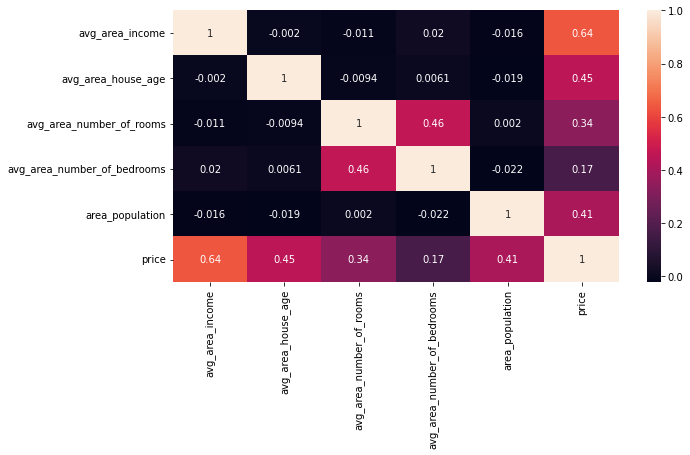

In [ ]:
sns.heatmap(housing.corr(), annot=True);

## EDA Observation
* all variables are pass the Normality test
* all variables show a linear relationship and pass the White test
* but of course `number of bedrooms` are not homoscedastic because its a categorical data.
* All variables pass the assumptions needed to proceed to interpret the output of regression model (which we kinda build already)
* average income has highest correlation
* number of bedrooms dont seem to affect price

## Lienar Regression Model
* remove address column
* split into X array, and y array 

In [ ]:
y = housing.price
X = housing.drop(['price', 'address'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
# Parameters:
# arrays
# test size = 0.25  25% default
# training size     75% default
# random_state      same as np.set.seed(), makes results reproducible

In [ ]:
# split into Training and Testin set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train # nicely shuffled the data

,avg_area_income,avg_area_house_age,avg_area_number_of_rooms,avg_area_number_of_bedrooms,area_population
1522,67716.748222,6.431119,7.753989,5.28,40562.188948
835,78095.352630,6.837193,7.119862,3.00,32346.434992
358,55577.071754,6.533916,7.162536,3.47,19560.012414
138,63876.059910,7.080219,7.187433,3.37,38052.876443
299,52188.118727,5.636892,5.807401,4.03,42495.754677
...,...,...,...,...,...
4426,76223.561256,6.371627,5.342217,2.42,30165.337445
466,56685.014442,6.958045,7.502115,3.38,43322.166854
3092,66195.337714,6.507971,6.611861,3.14,37288.923574
3772,58694.515017,7.394768,9.269453,4.32,49960.977236


## Create and Train Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# initiate model
lm = LinearRegression()

lm.fit(X_train, y_train) # run on training set

## Model Evaluation
* look at coefficient
* how we can interpret results

In [ ]:
lm.score(X_train, y_train)

0.9186953001963705

In [ ]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coef_df

,Coefficient
avg_area_income,21.589887
avg_area_house_age,166102.501246
avg_area_number_of_rooms,119895.936402
avg_area_number_of_bedrooms,1901.071012
area_population,15.231503


## Interpreting the results
* **Ceterus Paribus (CP)**, which means "Holding All other features fixed"
- CP, a 1 unit increase in **avg_area_income** is associated with an **increase of \$21.59**
- CP, a 1 unit increase in **avg_area_house_age** is associated with an **increase of \$166102.50**
- CP, a 1 unit increase in **avg_area_number_of_rooms** is associated with an **increase of \$119895.94**
- CP, a 1 unit increase in **avg_area_number_of_bedrooms** is associated with an **increase of \$1901.07**
- CP, a 1 unit increase in **area_population** is associated with an **increase of \$15.23**




## Model Predictions

In [ ]:
predictions = lm.predict(X_test)

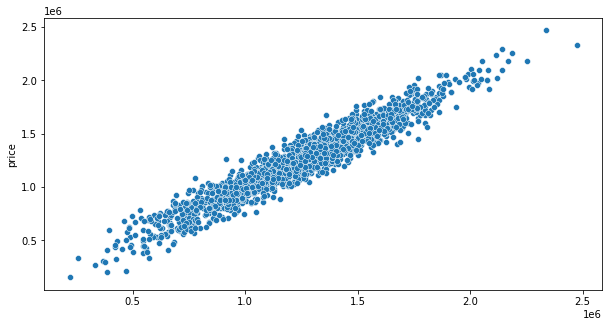

In [ ]:
sns.scatterplot(y=y_test, x=predictions);

* Looks good, not alot of spread
* But of course we needa check residuals

## Residual Plots
* Indicates how distributed the residuals are

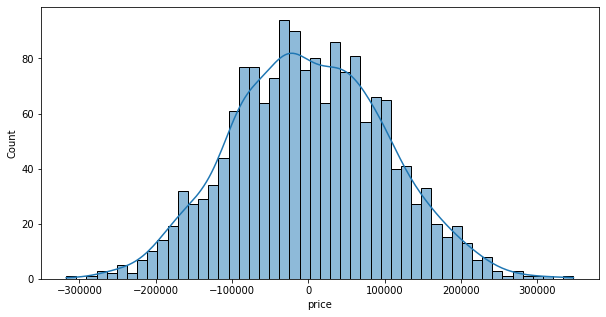

In [ ]:
sns.histplot((y_test - predictions), bins=50, kde=True);

# Not skewed but spread is high. So lots of errors made

## Regression Evaluation Metrics
Common metrics to compare with different models.

**Mean Absolute Error** (MAE) is the mean of absolute value of errors

**Mean Squared Error** (MSE) is the mean of squared errors

**Root Mean Squared Error** (RMSE) is the square root of mean of squared errors

Comparing these metrics:
* **MAE** is the average error
* **MSE** more practical, because MSE 'punishes' larger errors
* **RMSE** most popular, because RMSE is interpretable in the y-units. (\$ price units this case)

In [ ]:
from sklearn import metrics 

In [ ]:
print("MAE", metrics.mean_absolute_error(y_test, predictions))
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 80893.81190770479
MSE 10013679978.583364
RMSE 100068.376516177


## Interpreting Evaluation Metrics
* **RMSE** tells us we can be off by about \$100,000 which isnt great.
* so we can work on the model

# 😁😁😁😁

# Dataset 2. Boston Housing

In [ ]:
import pandas as pd
import numpy as np

from scipy.stats import stats, kurtosis, skew
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white


import seaborn as sns 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [ ]:
# this data is in dictionary! PRACTICE DATA MANIPULATION
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
# The MEDV is our target value - Median value of owner-occupied homes in $1000's
print(boston_dataset['DESCR'])

# CHAS -> categorical -> ANOVA

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston['MEDV'] = boston_dataset.target
boston.info()

# All data are floats, no missing value, So we can go straight to EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## EDA

Kurtosis:  1.4686287722747462 
Skew:  1.104810822864635


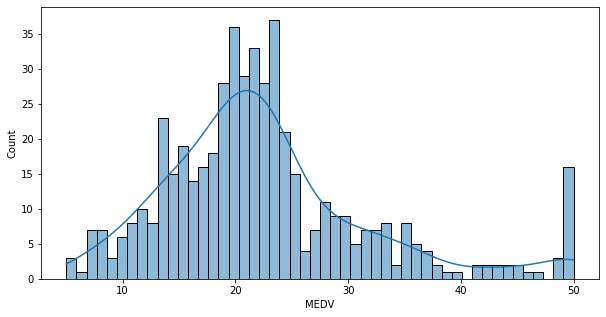

In [ ]:
sns.histplot(boston['MEDV'], bins=50, kde=True);

print('Kurtosis: ', stats.kurtosis(boston['MEDV']), '\n' + 
      'Skew: ', stats.skew(boston['MEDV']))

# Massive outlier, not so normal

In [ ]:
# All floats so we can use Pearson r

stats_result_df = pd.DataFrame(columns = ['stat', '+/-', 'effect_size', 'p-value', 'kurtosis', 'skewness', 'white-test'])

for feature in boston:
  # Pearson correlation
  r, p = stats.pearsonr(boston[feature], boston['MEDV'])

  # Normality test
  k, s = stats.kurtosis(boston[feature]), stats.skew(boston[feature])

  # White-test
  model = sm.OLS(boston['MEDV'], boston[[feature]].assign(const=1)).fit()
  white_test = het_white(model.resid, model.model.exog)
  
  stats_result_df.loc[feature] = ['r', np.sign(r), abs(round(r,3)), round(p, 6), round(k, 3), round(s, 3), round(white_test[1],3)]

In [ ]:
stats_result_df.sort_values(by='effect_size', ascending=False)

,stat,+/-,effect_size,p-value,kurtosis,skewness,white-test
MEDV,r,1.0,1.000,0.000000,1.469,1.105,0.000
LSTAT,r,-1.0,0.738,0.000000,0.477,0.904,0.000
RM,r,1.0,0.695,0.000000,1.861,0.402,0.000
PTRATIO,r,-1.0,0.508,0.000000,-0.294,-0.800,0.000
INDUS,r,-1.0,0.484,0.000000,-1.233,0.294,0.354
TAX,r,-1.0,0.469,0.000000,-1.143,0.668,0.408
NOX,r,-1.0,0.427,0.000000,-0.076,0.727,0.048
CRIM,r,-1.0,0.388,0.000000,36.753,5.208,0.024
RAD,r,-1.0,0.382,0.000000,-0.871,1.002,0.621
AGE,r,-1.0,0.377,0.000000,-0.970,-0.597,0.066


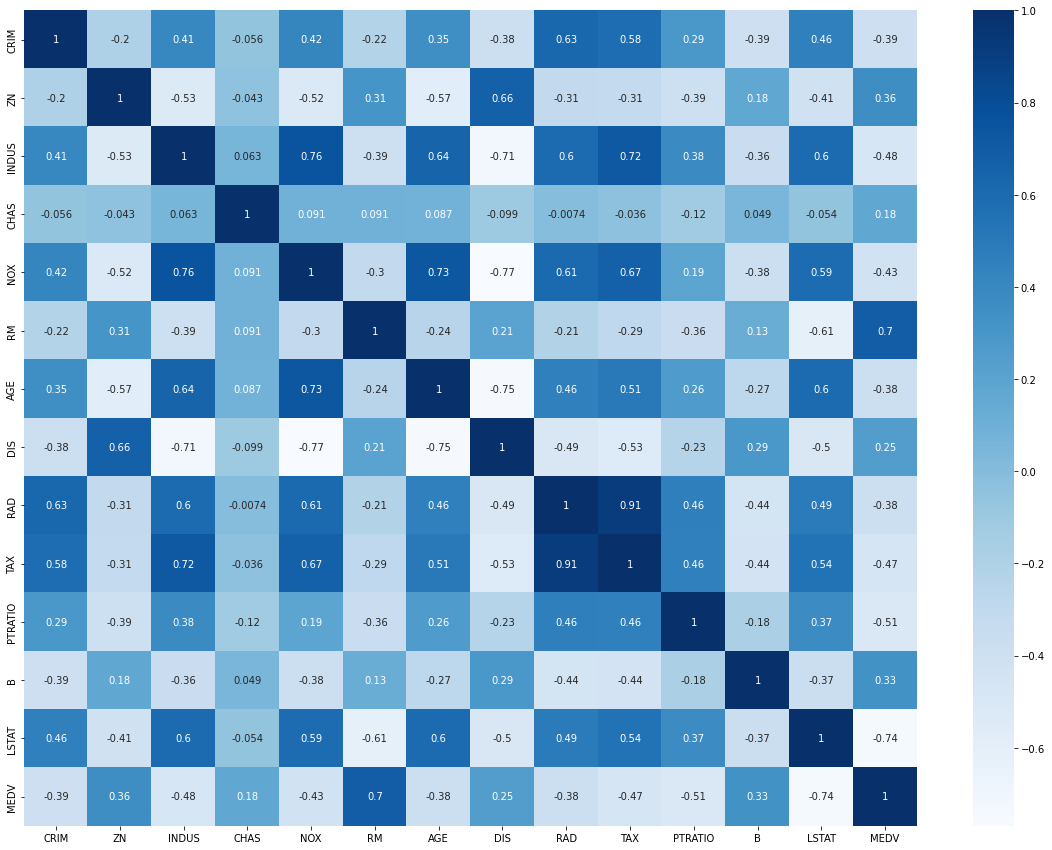

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(boston.corr(), annot=True, cmap='Blues');

F_onewayResult(statistic=15.971512420371955, pvalue=7.390623170520815e-05)


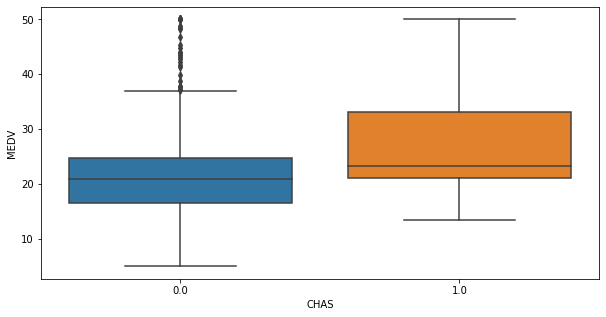

In [ ]:
# CHAS was categorical so we can use ANOVA to see if mean is different between the 2
boston_chad = boston.groupby('CHAS')['MEDV'].apply(list)

print(stats.f_oneway(*boston_chad))

# Results show CHAS does differ
sns.boxplot(x=boston['CHAS'], y=boston['MEDV']);

In [ ]:
# Now focus on the top 2 variables with highest r

def side_by_side(data, feature_list, target):
  plt.figure(figsize=(20,6))
  for i, col in enumerate(feature_list):
    plt.subplot(1, len(feature_list), i+1)
    X = data[col]
    y = data[target]
    sns.scatterplot(x=X, y=y);
    plt.title(col)

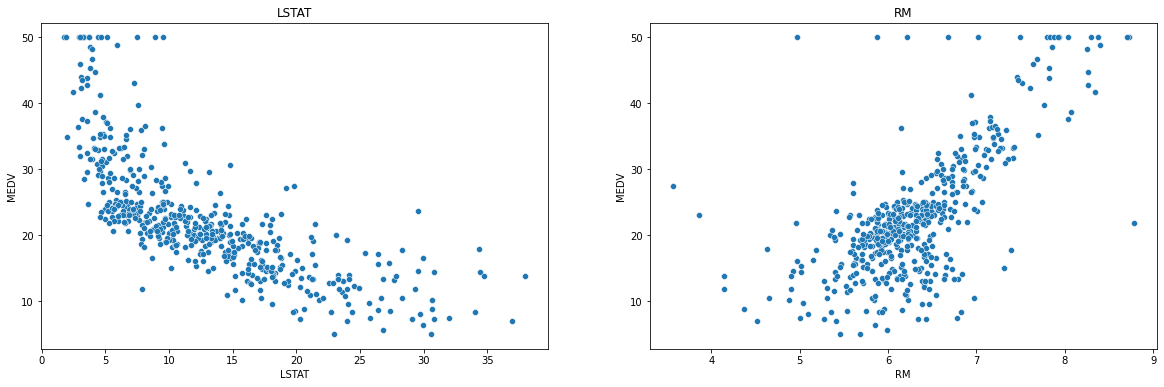

In [ ]:
features = ['LSTAT', 'RM']
target = 'MEDV'

side_by_side(boston, features, target)

## EDA Observation
* price is capped at 50, so our model will only predict up to that price
* cant predict anythign above

## Prepare Training Data

In [ ]:
X = boston[['LSTAT', 'RM']]
y = boston['MEDV']

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [ ]:
lm = LinearRegression() # initiate model
lm.fit(X_train, y_train) # fit on training set

prediction = lm.predict(X_test)

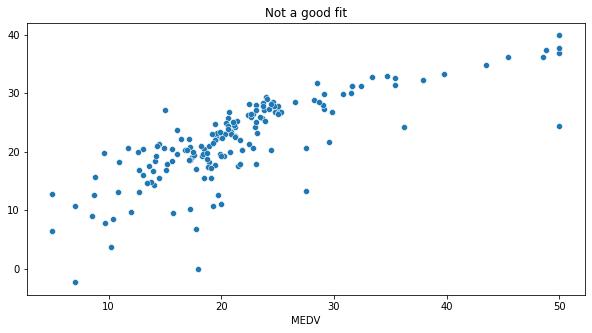

In [ ]:
plt.title('Not a good fit')
sns.scatterplot(x= y_test, y=prediction);

In [ ]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coef_df

,Coefficient
LSTAT,-0.678739
RM,4.820356


## Interpreting the Results
- CP, a 1 unit increase in **LSTAT** is associated with a **decrease** of \$0.67 
- CP, a 1 unit increase in **RM** is associated with an **increase of** \$4.82

In [ ]:
# Residual distribution

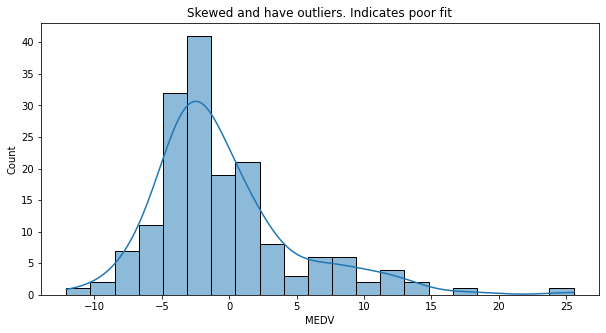

In [ ]:
plt.title('Skewed and have outliers. Indicates poor fit')
sns.histplot(y_test - prediction, kde=True);

In [ ]:
print("MAE", metrics.mean_absolute_error(y_test, prediction))
print("MSE", metrics.mean_squared_error(y_test, prediction))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R-squared', metrics.r2_score(y_test, prediction))

# Our model explains about 62% of the variation. So pretty good but not good enough
# Improvements can be made by removing outliers and adding more variables

MAE 4.019105583285631
MSE 28.97075021100662
RMSE 5.38244834726787
R-squared 0.6171865588521173
